In [21]:
import os
import shutil
import cv2
import os
import random
import numpy as np

In [23]:
source_dir = "data"

destination_dir = "orderedImages"

class_folders = os.listdir(source_dir)

for class_folder in class_folders:
    # Create a directory in the destination folder with the same class name
    destination_class_dir = os.path.join(destination_dir, class_folder)
    os.makedirs(destination_class_dir, exist_ok=True)

    class_folder_path = os.path.join(source_dir, class_folder)
    image_files = [f for f in os.listdir(class_folder_path) if f.endswith(".jpg")]

    # Rename and copy the images
    for i, image_file in enumerate(image_files, start=1):
        src_path = os.path.join(class_folder_path, image_file)
        dst_filename = f"{i}.jpg" 
        dst_path = os.path.join(destination_class_dir, dst_filename)

        shutil.copy(src_path, dst_path)

        print(f"Renamed and copied: {src_path} -> {dst_path}")


Renamed and copied: data\0\box_0 (2).jpg -> orderedImages\0\1.jpg
Renamed and copied: data\0\box_0.jpg -> orderedImages\0\2.jpg
Renamed and copied: data\0\box_10.jpg -> orderedImages\0\3.jpg
Renamed and copied: data\0\box_100.jpg -> orderedImages\0\4.jpg
Renamed and copied: data\0\box_101.jpg -> orderedImages\0\5.jpg
Renamed and copied: data\0\box_102.jpg -> orderedImages\0\6.jpg
Renamed and copied: data\0\box_103 (2).jpg -> orderedImages\0\7.jpg
Renamed and copied: data\0\box_103.jpg -> orderedImages\0\8.jpg
Renamed and copied: data\0\box_104.jpg -> orderedImages\0\9.jpg
Renamed and copied: data\0\box_105.jpg -> orderedImages\0\10.jpg
Renamed and copied: data\0\box_107.jpg -> orderedImages\0\11.jpg
Renamed and copied: data\0\box_108 (2).jpg -> orderedImages\0\12.jpg
Renamed and copied: data\0\box_108.jpg -> orderedImages\0\13.jpg
Renamed and copied: data\0\box_109.jpg -> orderedImages\0\14.jpg
Renamed and copied: data\0\box_11 (2).jpg -> orderedImages\0\15.jpg
Renamed and copied: data

In [24]:
# Data augmentation parameters
rotationRange = 2  
brightnessRange = 0.09 
contrastRange = 0.09 
positionShiftRange = 6 

sourceDir = "orderedImages"

destinationDir = "augmentedImages"

# Number of times to augment each image
augmentationFactor = 3

os.makedirs(destinationDir, exist_ok=True)

classFolders = os.listdir(sourceDir)

for classFolder in classFolders:
    classFolderPath = os.path.join(sourceDir, classFolder)
    destinationClassDir = os.path.join(destinationDir, classFolder)
    os.makedirs(destinationClassDir, exist_ok=True)

    imageFiles = [f for f in os.listdir(classFolderPath) if f.endswith(".jpg")]

    for imageFile in imageFiles:
        srcPath = os.path.join(classFolderPath, imageFile)

        image = cv2.imread(srcPath, cv2.IMREAD_GRAYSCALE)

        for i in range(1, augmentationFactor + 1):
            angle = random.uniform(-rotationRange, rotationRange)
            brightness = 1 + random.uniform(-brightnessRange, brightnessRange)
            contrast = 1 + random.uniform(-contrastRange, contrastRange)

            M = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), angle, 1)
            image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
            image = cv2.convertScaleAbs(image, alpha=brightness, beta=0)
            image = cv2.convertScaleAbs(image, alpha=contrast, beta=0)

            shiftX = random.randint(-positionShiftRange, positionShiftRange)
            shiftY = random.randint(-positionShiftRange, positionShiftRange)
            rows, cols = image.shape
            M = np.float32([[1, 0, shiftX], [0, 1, shiftY]])
            image = cv2.warpAffine(image, M, (cols, rows))

            augmentedFilename = f"{imageFile.replace('.jpg', '')}Aug{i}.jpg"
            dstPath = os.path.join(destinationClassDir, augmentedFilename)
            cv2.imwrite(dstPath, image)


In [ ]:
ordered_images_dir = "orderedImages"
augmented_images_dir = "augmentedImages"

processed_data_dir = "ProcessedData"

os.makedirs(processed_data_dir, exist_ok=True)

def process_image(src_path, dst_path, size=(50, 50)):
    image = cv2.imread(src_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, size)  
    cv2.imwrite(dst_path, image)

for class_folder in os.listdir(ordered_images_dir):
    class_folder_path = os.path.join(ordered_images_dir, class_folder)
    destination_class_dir = os.path.join(processed_data_dir, class_folder)
    os.makedirs(destination_class_dir, exist_ok=True)

    image_files = [f for f in os.listdir(class_folder_path) if f.endswith(".jpg")]

    for image_file in image_files:
        src_path = os.path.join(class_folder_path, image_file)
        dst_path = os.path.join(destination_class_dir, image_file)

        process_image(src_path, dst_path)

for class_folder in os.listdir(augmented_images_dir):
    class_folder_path = os.path.join(augmented_images_dir, class_folder)
    destination_class_dir = os.path.join(processed_data_dir, class_folder)
    os.makedirs(destination_class_dir, exist_ok=True)

    image_files = [f for f in os.listdir(class_folder_path) if f.endswith(".jpg")]

    for image_file in image_files:
        src_path = os.path.join(class_folder_path, image_file)
        dst_path = os.path.join(destination_class_dir, image_file)

        process_image(src_path, dst_path)


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
import tensorflow as tf
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
import random
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping

%matplotlib inline

In [ ]:
images = []
labels = []
label_mapping = {'0': 0,'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16}

path = 'ProcessedData/'

dir_list = os.listdir(path)
for i in dir_list:
    dir = os.path.join(path, i)
    file_list = os.listdir(dir)
    for j in file_list:
        files = os.path.join(dir, j)
        img = cv2.imread(files, cv2.IMREAD_GRAYSCALE)
        img = np.array(img, dtype=np.float32)
        img = img / 255
        images.append(img)
        labels.append(i)

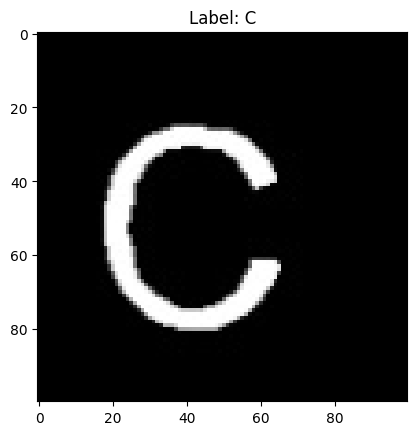

In [9]:
random_index = random.randint(0, len(images) - 1)

plt.imshow(images[random_index], cmap='gray')
plt.title(f'Label: {labels[random_index]}')
plt.show()

In [10]:
X = np.array(images)
len(X)
X.shape

(11016, 100, 100)

In [11]:
y = [label_mapping[label] for label in labels]
len(y)


11016

In [12]:
num_classes = 17

le = LabelEncoder()
y = le.fit_transform(y)
X, y = shuffle(X, y, random_state=42)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train length:", len(y_train))
print("y_test length:", len(y_test))

X_train shape: (8812, 100, 100)
X_test shape: (2204, 100, 100)
y_train length: 8812
y_test length: 2204


In [14]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5, # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  
)

In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 32)        320       
                                                                 
 batch_normalization_3 (Bat  (None, 98, 98, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                      

In [1]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=25,
    epochs=100, 
    callbacks=[early_stopping]  
)


KeyboardInterrupt



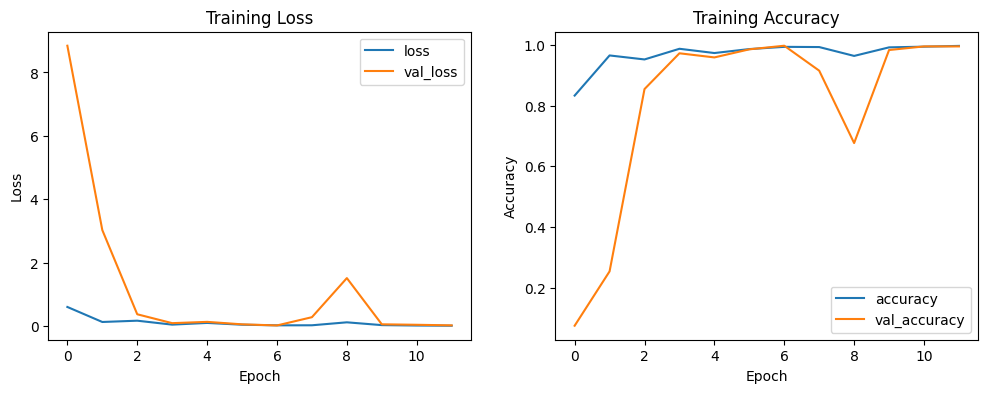

In [13]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.show()

In [14]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

69/69 [==============================] - 2s 35ms/step - loss: 0.0252 - accuracy: 0.9941
Test Loss: 0.025203019380569458, Test Accuracy: 0.9941016435623169


In [15]:
model.save('ModelOCR.h5') 

C:\Users\luqch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


h.5 -> bin, json

anaconda promt

activate tfjs
tensorflowjs_converter --input_format=keras C:\Users\luqch\Desktop\MyData\ModelOCR.h5 C:\Users\luqch\Desktop\MyData\model

combine weights:
open cmd in: C:\Users\luqch\Desktop\MyData\model
type group1-shard1of2.bin group1-shard2of2.bin > group1-shard.bin
keep group1-shard.bin and model.json